In [2]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
import contextlib

In [7]:
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 50
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
amplitude = 16000


In [8]:
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
uponx=[100.0/x for x in range(1,num_samples+1)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
sine_noise2=[np.sin(2*np.pi*10*x1/sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)
sine_noise2=np.array(sine_noise2)

In [14]:
combined_signal = sine_noise*uponx
combined_signal=np.array(combined_signal)
combined_signal=np.concatenate((combined_signal[:12000],combined_signal[:12000]),axis=0)
combined_signal=np.concatenate((combined_signal,combined_signal),axis=0)

In [15]:
file="./test.wav"
nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2
wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
for s in combined_signal:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

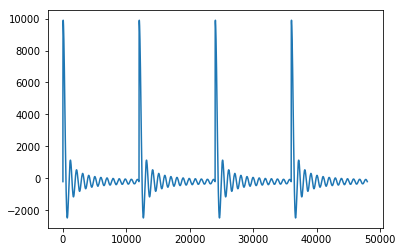

In [91]:
#infile="./Audio_Speech_Actors_01-24/Actor_02/03-01-08-02-02-01-02.wav"
infile="./test.wav"
num_samp=100000
wave_file=wave.open(infile,'r') #file read
data=wave_file.readframes(num_samples)
wave_file.close()
data=struct.unpack('{n}h'.format(n=num_samples),data)
#data=data[num_samp/2:]
data=np.array(data)
#plt.plot(data)
data=data-data.mean()
plt.plot(np.array(data))

In [ ]:
combined_signal.shape

In [52]:
fname="./test.wav"
with contextlib.closing(wave.open(fname,'r')) as f:
    frames =f.getnframes()
    rate=f.getframerate()
    duration=frames/(rate*1.0)
print "duration=",duration
print "rate=",rate
print "frames=",frames


duration= 1.0
rate= 48000
frames= 48000


In [73]:
fname="./Audio_Speech_Actors_01-24/Actor_02/03-01-01-01-01-02-02.wav"
audio=wave.open(fname,'r')
print audio.getsampwidth()
print audio.getnframes()
print audio.getframerate()
print "time of audio is=",audio.getnframes()/(1.0*audio.getframerate()),"s"
signal=audio.readframes(audio.getnframes())
signal=struct.unpack('{n}h'.format(n=audio.getnframes()),signal)


2
172973
48000
time of audio is= 3.60360416667 s


In [75]:
rfft_signal=np.fft.rfft(signal) # returns the argument of the maximum value

In [88]:
arg=(np.abs(rfft_signal)*np.array([i for i in range(audio.getnframes()/2+1)])).sum()

In [90]:
arg/np.abs(rfft_signal).sum()

10146.021271210768

In [109]:
data-=data.mean()

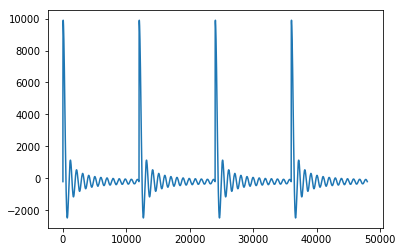

In [110]:
plt.plot(data)

In [112]:
a=np.fft.rfft(data)

In [1]:
import pydsm

ImportError: No module named pydsm